In [1]:
import os
import numpy as np
import efficientnet.tfkeras
from tensorflow.keras.models import load_model
import tensorflow as tf
import pandas as pd

2024-10-24 10:56:56.332234: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-24 10:56:56.422918: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-24 10:56:56.894975: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/kannika/miniconda3/envs/tfNetV2/lib/
2024-10-24 10:56:56.895021: W tensorflow/co

In [2]:
## set gpu
gpu = 0
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   
os.environ["CUDA_VISIBLE_DEVICES"] = f"{gpu}" 
physical_devices = tf.config.list_physical_devices('GPU') 
print("Num GPUs:", len(physical_devices))

Num GPUs: 1


## Load datatest

In [3]:
TESTdf = pd.read_csv("/home/kannika/codes_AI/CSV/DATATEST_mini-ImageNet_MachineUnlearn.csv", dtype=str)
print(TESTdf.shape)
TESTdf.head()

(6000, 12)


,Unnamed: 0.1,Unnamed: 0,img_path,filename,label,cls,subset,Encode_label,img_path_main,img_path_2,filename_main,filename_2
0,0,270,/media/HDD/mini-ImageNet/mini-imagenet/train/n...,n0444325700000402.jpg,n04443257,TRUE,test,1,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,n0444325700000402_batchmain.jpg,n0444325700000402_batch2.jpg
1,1,271,/media/HDD/mini-ImageNet/mini-imagenet/train/n...,n0444325700001200.jpg,n04443257,TRUE,test,1,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,n0444325700001200_batchmain.jpg,n0444325700001200_batch2.jpg
2,2,272,/media/HDD/mini-ImageNet/mini-imagenet/train/n...,n0444325700000584.jpg,n04443257,TRUE,test,1,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,n0444325700000584_batchmain.jpg,n0444325700000584_batch2.jpg
3,3,273,/media/HDD/mini-ImageNet/mini-imagenet/train/n...,n0444325700000311.jpg,n04443257,TRUE,test,1,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,n0444325700000311_batchmain.jpg,n0444325700000311_batch2.jpg
4,4,274,/media/HDD/mini-ImageNet/mini-imagenet/train/n...,n0444325700000037.jpg,n04443257,TRUE,test,1,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,n0444325700000037_batchmain.jpg,n0444325700000037_batch2.jpg


In [4]:
#TESTdf01 = TESTdf.sample(100, replace=False)
TESTdf01 = TESTdf.iloc[:2000,:]
TESTdf01 = TESTdf01.reset_index(drop=True)
print(TESTdf01.shape)
TESTdf01.tail()

(2000, 12)


,Unnamed: 0.1,Unnamed: 0,img_path,filename,label,cls,subset,Encode_label,img_path_main,img_path_2,filename_main,filename_2
1995,1995,20085,/media/HDD/mini-ImageNet/mini-imagenet/val/n02...,n0213844100000975.jpg,n02138441,TRUE,test,1,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,n0213844100000975_batchmain.jpg,n0213844100000975_batch2.jpg
1996,1996,20086,/media/HDD/mini-ImageNet/mini-imagenet/val/n02...,n0213844100000480.jpg,n02138441,TRUE,test,1,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,n0213844100000480_batchmain.jpg,n0213844100000480_batch2.jpg
1997,1997,20087,/media/HDD/mini-ImageNet/mini-imagenet/val/n02...,n0213844100000935.jpg,n02138441,TRUE,test,1,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,n0213844100000935_batchmain.jpg,n0213844100000935_batch2.jpg
1998,1998,20088,/media/HDD/mini-ImageNet/mini-imagenet/val/n02...,n0213844100001081.jpg,n02138441,TRUE,test,1,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,n0213844100001081_batchmain.jpg,n0213844100001081_batch2.jpg
1999,1999,20089,/media/HDD/mini-ImageNet/mini-imagenet/val/n02...,n0213844100001100.jpg,n02138441,TRUE,test,1,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,n0213844100001100_batchmain.jpg,n0213844100001100_batch2.jpg


In [4]:
TESTdf02 = TESTdf.iloc[2000:4000,:]
TESTdf02 = TESTdf02.reset_index(drop=True)
print(TESTdf02.shape)
TESTdf02

(2000, 12)


,Unnamed: 0.1,Unnamed: 0,img_path,filename,label,cls,subset,Encode_label,img_path_main,img_path_2,filename_main,filename_2
0,2000,20090,/media/HDD/mini-ImageNet/mini-imagenet/val/n02...,n0213844100000179.jpg,n02138441,TRUE,test,1,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,n0213844100000179_batchmain.jpg,n0213844100000179_batch2.jpg
1,2001,20091,/media/HDD/mini-ImageNet/mini-imagenet/val/n02...,n0213844100000240.jpg,n02138441,TRUE,test,1,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,n0213844100000240_batchmain.jpg,n0213844100000240_batch2.jpg
2,2002,20092,/media/HDD/mini-ImageNet/mini-imagenet/val/n02...,n0213844100001038.jpg,n02138441,TRUE,test,1,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,n0213844100001038_batchmain.jpg,n0213844100001038_batch2.jpg
3,2003,20093,/media/HDD/mini-ImageNet/mini-imagenet/val/n02...,n0213844100000312.jpg,n02138441,TRUE,test,1,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,n0213844100000312_batchmain.jpg,n0213844100000312_batch2.jpg
4,2004,20094,/media/HDD/mini-ImageNet/mini-imagenet/val/n02...,n0213844100000391.jpg,n02138441,TRUE,test,1,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,n0213844100000391_batchmain.jpg,n0213844100000391_batch2.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,3995,40175,/media/HDD/mini-ImageNet/mini-imagenet/val/n09...,n0925647900000718.jpg,n09256479,FALSE,test,0,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,n0925647900000718_batchmain.jpg,n0925647900000718_batch2.jpg
1996,3996,40176,/media/HDD/mini-ImageNet/mini-imagenet/val/n09...,n0925647900000155.jpg,n09256479,FALSE,test,0,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,n0925647900000155_batchmain.jpg,n0925647900000155_batch2.jpg
1997,3997,40177,/media/HDD/mini-ImageNet/mini-imagenet/val/n09...,n0925647900000447.jpg,n09256479,FALSE,test,0,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,n0925647900000447_batchmain.jpg,n0925647900000447_batch2.jpg
1998,3998,40178,/media/HDD/mini-ImageNet/mini-imagenet/val/n09...,n0925647900000755.jpg,n09256479,FALSE,test,0,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,n0925647900000755_batchmain.jpg,n0925647900000755_batch2.jpg


In [4]:
TESTdf03 = TESTdf.iloc[4000:,:]
TESTdf03 = TESTdf03.reset_index(drop=True)
print(TESTdf03.shape)
TESTdf03

(2000, 12)


,Unnamed: 0.1,Unnamed: 0,img_path,filename,label,cls,subset,Encode_label,img_path_main,img_path_2,filename_main,filename_2
0,4000,40180,/media/HDD/mini-ImageNet/mini-imagenet/val/n09...,n0925647900000600.jpg,n09256479,FALSE,test,0,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,n0925647900000600_batchmain.jpg,n0925647900000600_batch2.jpg
1,4001,40181,/media/HDD/mini-ImageNet/mini-imagenet/val/n09...,n0925647900000624.jpg,n09256479,FALSE,test,0,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,n0925647900000624_batchmain.jpg,n0925647900000624_batch2.jpg
2,4002,40182,/media/HDD/mini-ImageNet/mini-imagenet/val/n09...,n0925647900000920.jpg,n09256479,FALSE,test,0,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,n0925647900000920_batchmain.jpg,n0925647900000920_batch2.jpg
3,4003,40183,/media/HDD/mini-ImageNet/mini-imagenet/val/n09...,n0925647900000803.jpg,n09256479,FALSE,test,0,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,n0925647900000803_batchmain.jpg,n0925647900000803_batch2.jpg
4,4004,40184,/media/HDD/mini-ImageNet/mini-imagenet/val/n09...,n0925647900000491.jpg,n09256479,FALSE,test,0,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,n0925647900000491_batchmain.jpg,n0925647900000491_batch2.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,5995,59995,/media/HDD/mini-ImageNet/mini-imagenet/train/n...,n0383889900000771.jpg,n03838899,FALSE,test,0,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,n0383889900000771_batchmain.jpg,n0383889900000771_batch2.jpg
1996,5996,59996,/media/HDD/mini-ImageNet/mini-imagenet/train/n...,n0383889900000066.jpg,n03838899,FALSE,test,0,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,n0383889900000066_batchmain.jpg,n0383889900000066_batch2.jpg
1997,5997,59997,/media/HDD/mini-ImageNet/mini-imagenet/train/n...,n0383889900000604.jpg,n03838899,FALSE,test,0,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,n0383889900000604_batchmain.jpg,n0383889900000604_batch2.jpg
1998,5998,59998,/media/HDD/mini-ImageNet/mini-imagenet/train/n...,n0383889900000030.jpg,n03838899,FALSE,test,0,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,n0383889900000030_batchmain.jpg,n0383889900000030_batch2.jpg


### Prepare Batch Test

In [5]:
from tensorflow.keras.preprocessing import image

def TENSOR_image(img_path):
    # Read the image and resize it
    img = image.load_img(img_path, target_size=(height, width))
    # Convert it to a Numpy array with target shape.
    x = image.img_to_array(img)
    # Reshape
    x = x.reshape((1,) + x.shape)
    x /= 255.

    return x

In [6]:
height = width = 456

In [7]:
def preparebatch(TESTdf):
    listimg_test = []
    for j in range(len(TESTdf)):
        pathimgmain = TESTdf["img_path_main"][j]
        x_main = TENSOR_image(pathimgmain)
        pathimg2 = TESTdf["img_path_2"][j]
        x_2 = TENSOR_image(pathimg2)
        img_test = [x_main, x_2]
        listimg_test.append(img_test)
        
    return listimg_test

In [8]:
listimg_test01=preparebatch(TESTdf01)
print(len(listimg_test01))

2000


In [8]:
listimg_test02=preparebatch(TESTdf02)
print(len(listimg_test02))

2000


In [8]:
listimg_test03=preparebatch(TESTdf03)
print(len(listimg_test03))

2000


In [ ]:
print(len(listimg_test01)+len(listimg_test02)+len(listimg_test03))

## Load model

In [9]:
model_dir = '/media/HDD/mini-ImageNet/EffNetB5Model_unlearn/R2/unfreezeB4/on_epoch_end_resume/modelEffNetB5_Unlearning_unfreezeB4_R2.h5'
print(f"Load Model: {model_dir}")
model = load_model(model_dir)
height = width = model.input_shape[1]
print(height, width)

Load Model: /media/HDD/mini-ImageNet/EffNetB5Model_unlearn/R2/unfreezeB4/on_epoch_end_resume/modelEffNetB5_Unlearning_unfreezeB4_R2.h5


2024-10-24 10:57:23.978176: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-24 10:57:24.412845: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9621 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:17:00.0, compute capability: 7.5


(None, 456, 456, 3) (None, 456, 456, 3)


In [10]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 456, 456, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_3 (InputLayer)           [(None, 456, 456, 3  0           []                               
                                )]                                                                
                                                                                                  
 concatenate (Concatenate)      (None, 456, 456, 6)  0           ['input_2[0][0]',                
                                                                  'input_3[0][0]']            

In [11]:
model.input_shape[0][1]

456

### 💡Predict

In [12]:
def predicted(listimg_test):
    pred_list = list()
    prob_list = list()

    for i in range(0, len(listimg_test)):
        predict = model.predict(listimg_test[i]) 
        predict0 = predict[0][0]
        prob_list.append(predict0)
        if predict0 > 0.5:
            pred_list.append("TRUE")
        else:
            pred_list.append("FALSE")
            
    return pred_list, prob_list

In [13]:
pred_list01, prob_list01 = predicted(listimg_test01)
print(len(pred_list01))
print(len(prob_list01))

2024-10-24 10:42:43.391167: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100
2024-10-24 10:42:44.261408: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-10-24 10:42:44.262272: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-10-24 10:42:44.262283: W tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:85] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2024-10-24 10:42:44.263036: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-10-24 10:42:44.263070: W tensorflow/compiler/xla/stream_executor/gpu/redzone_allocator.cc:318] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


1/1 [==============================] - 0s 48ms/step


1/1 [==============================] - 0s 53ms/step


1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 60ms/step


1/1 [==============================] - 0s 48ms/step


1/1 [==============================] - 0s 44ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step
2000
2000


In [13]:
pred_list02, prob_list02 = predicted(listimg_test02)
print(len(pred_list02))
print(len(prob_list02))

2024-10-24 10:51:23.258635: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100
2024-10-24 10:51:23.645480: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-10-24 10:51:23.646380: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-10-24 10:51:23.646394: W tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:85] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2024-10-24 10:51:23.647161: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-10-24 10:51:23.647198: W tensorflow/compiler/xla/stream_executor/gpu/redzone_allocator.cc:318] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 52ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 44ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 46ms/step


1/1 [==============================] - 0s 46ms/step


1/1 [==============================] - 0s 50ms/step


1/1 [==============================] - 0s 45ms/step
2000
2000


In [13]:
pred_list03, prob_list03 = predicted(listimg_test03)
print(len(pred_list03))
print(len(prob_list03))

2024-10-24 10:57:45.740625: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100
2024-10-24 10:57:46.131173: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-10-24 10:57:46.131914: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-10-24 10:57:46.131924: W tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:85] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2024-10-24 10:57:46.132616: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-10-24 10:57:46.132655: W tensorflow/compiler/xla/stream_executor/gpu/redzone_allocator.cc:318] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 48ms/step


1/1 [==============================] - 0s 46ms/step


1/1 [==============================] - 0s 46ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 44ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 54ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 34ms/step
2000
2000


In [14]:
print(len(pred_list01))
print(len(prob_list01))

2000
2000


In [14]:
print(len(pred_list02))
print(len(prob_list02))

2000
2000


In [14]:
print(len(pred_list03))
print(len(prob_list03))

2000
2000


In [17]:
#print(pred_list01)

In [15]:
TESTdf01['category'] = pred_list01
TESTdf01['Prob'] = prob_list01
TESTdf01.head()

,Unnamed: 0.1,Unnamed: 0,img_path,filename,label,cls,subset,Encode_label,img_path_main,img_path_2,filename_main,filename_2,category,Prob
0,0,270,/media/HDD/mini-ImageNet/mini-imagenet/train/n...,n0444325700000402.jpg,n04443257,TRUE,test,1,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,n0444325700000402_batchmain.jpg,n0444325700000402_batch2.jpg,FALSE,0.331124
1,1,271,/media/HDD/mini-ImageNet/mini-imagenet/train/n...,n0444325700001200.jpg,n04443257,TRUE,test,1,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,n0444325700001200_batchmain.jpg,n0444325700001200_batch2.jpg,FALSE,0.044877
2,2,272,/media/HDD/mini-ImageNet/mini-imagenet/train/n...,n0444325700000584.jpg,n04443257,TRUE,test,1,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,n0444325700000584_batchmain.jpg,n0444325700000584_batch2.jpg,FALSE,0.233955
3,3,273,/media/HDD/mini-ImageNet/mini-imagenet/train/n...,n0444325700000311.jpg,n04443257,TRUE,test,1,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,n0444325700000311_batchmain.jpg,n0444325700000311_batch2.jpg,FALSE,0.110922
4,4,274,/media/HDD/mini-ImageNet/mini-imagenet/train/n...,n0444325700000037.jpg,n04443257,TRUE,test,1,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,n0444325700000037_batchmain.jpg,n0444325700000037_batch2.jpg,FALSE,0.073834


In [17]:
TESTdf02['category'] = pred_list02
TESTdf02['Prob'] = prob_list02
TESTdf02.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,img_path,filename,label,cls,subset,Encode_label,img_path_main,img_path_2,filename_main,filename_2,category,Prob
0,0,2000,20090,/media/HDD/mini-ImageNet/mini-imagenet/val/n02...,n0213844100000179.jpg,n02138441,TRUE,test,1,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,n0213844100000179_batchmain.jpg,n0213844100000179_batch2.jpg,FALSE,0.450609
1,1,2001,20091,/media/HDD/mini-ImageNet/mini-imagenet/val/n02...,n0213844100000240.jpg,n02138441,TRUE,test,1,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,n0213844100000240_batchmain.jpg,n0213844100000240_batch2.jpg,FALSE,0.149593
2,2,2002,20092,/media/HDD/mini-ImageNet/mini-imagenet/val/n02...,n0213844100001038.jpg,n02138441,TRUE,test,1,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,n0213844100001038_batchmain.jpg,n0213844100001038_batch2.jpg,FALSE,0.258595
3,3,2003,20093,/media/HDD/mini-ImageNet/mini-imagenet/val/n02...,n0213844100000312.jpg,n02138441,TRUE,test,1,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,n0213844100000312_batchmain.jpg,n0213844100000312_batch2.jpg,FALSE,0.189932
4,4,2004,20094,/media/HDD/mini-ImageNet/mini-imagenet/val/n02...,n0213844100000391.jpg,n02138441,TRUE,test,1,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,n0213844100000391_batchmain.jpg,n0213844100000391_batch2.jpg,FALSE,0.110644


In [15]:
TESTdf03['category'] = pred_list03
TESTdf03['Prob'] = prob_list03
TESTdf03.head()

,Unnamed: 0.1,Unnamed: 0,img_path,filename,label,cls,subset,Encode_label,img_path_main,img_path_2,filename_main,filename_2,category,Prob
0,4000,40180,/media/HDD/mini-ImageNet/mini-imagenet/val/n09...,n0925647900000600.jpg,n09256479,FALSE,test,0,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,n0925647900000600_batchmain.jpg,n0925647900000600_batch2.jpg,FALSE,0.272658
1,4001,40181,/media/HDD/mini-ImageNet/mini-imagenet/val/n09...,n0925647900000624.jpg,n09256479,FALSE,test,0,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,n0925647900000624_batchmain.jpg,n0925647900000624_batch2.jpg,FALSE,0.207845
2,4002,40182,/media/HDD/mini-ImageNet/mini-imagenet/val/n09...,n0925647900000920.jpg,n09256479,FALSE,test,0,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,n0925647900000920_batchmain.jpg,n0925647900000920_batch2.jpg,FALSE,0.177589
3,4003,40183,/media/HDD/mini-ImageNet/mini-imagenet/val/n09...,n0925647900000803.jpg,n09256479,FALSE,test,0,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,n0925647900000803_batchmain.jpg,n0925647900000803_batch2.jpg,FALSE,0.175936
4,4004,40184,/media/HDD/mini-ImageNet/mini-imagenet/val/n09...,n0925647900000491.jpg,n09256479,FALSE,test,0,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,n0925647900000491_batchmain.jpg,n0925647900000491_batch2.jpg,FALSE,0.169869


In [17]:
TESTdf01.to_csv("/home/kannika/codes_AI/CSV/predict_mini-ImageNet_MachineUnlearn_unfreezeB4_R2_TEST01.csv")

In [18]:
TESTdf02.to_csv("/home/kannika/codes_AI/CSV/predict_mini-ImageNet_MachineUnlearn__unfreezeB4_R2_TEST02.csv")

In [16]:
TESTdf03.to_csv("/home/kannika/codes_AI/CSV/predict_mini-ImageNet_MachineUnlearn__unfreezeB4_R2_TEST03.csv")

------------

In [17]:
TESTdf01 = pd.read_csv("/home/kannika/codes_AI/CSV/predict_mini-ImageNet_MachineUnlearn_unfreezeB4_R2_TEST01.csv", dtype=str)
print(TESTdf01.shape)
TESTdf01.head()

(2000, 15)


,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,img_path,filename,label,cls,subset,Encode_label,img_path_main,img_path_2,filename_main,filename_2,category,Prob
0,0,0,270,/media/HDD/mini-ImageNet/mini-imagenet/train/n...,n0444325700000402.jpg,n04443257,TRUE,test,1,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,n0444325700000402_batchmain.jpg,n0444325700000402_batch2.jpg,FALSE,0.3311241
1,1,1,271,/media/HDD/mini-ImageNet/mini-imagenet/train/n...,n0444325700001200.jpg,n04443257,TRUE,test,1,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,n0444325700001200_batchmain.jpg,n0444325700001200_batch2.jpg,FALSE,0.04487659
2,2,2,272,/media/HDD/mini-ImageNet/mini-imagenet/train/n...,n0444325700000584.jpg,n04443257,TRUE,test,1,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,n0444325700000584_batchmain.jpg,n0444325700000584_batch2.jpg,FALSE,0.23395541
3,3,3,273,/media/HDD/mini-ImageNet/mini-imagenet/train/n...,n0444325700000311.jpg,n04443257,TRUE,test,1,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,n0444325700000311_batchmain.jpg,n0444325700000311_batch2.jpg,FALSE,0.11092228
4,4,4,274,/media/HDD/mini-ImageNet/mini-imagenet/train/n...,n0444325700000037.jpg,n04443257,TRUE,test,1,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,n0444325700000037_batchmain.jpg,n0444325700000037_batch2.jpg,FALSE,0.07383351


In [18]:
TESTdf02 = pd.read_csv("/home/kannika/codes_AI/CSV/predict_mini-ImageNet_MachineUnlearn__unfreezeB4_R2_TEST02.csv", dtype=str)
print(TESTdf02.shape)
TESTdf02.head()

(2000, 16)


,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,img_path,filename,label,cls,subset,Encode_label,img_path_main,img_path_2,filename_main,filename_2,category,Prob
0,0,0,2000,20090,/media/HDD/mini-ImageNet/mini-imagenet/val/n02...,n0213844100000179.jpg,n02138441,TRUE,test,1,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,n0213844100000179_batchmain.jpg,n0213844100000179_batch2.jpg,FALSE,0.45060858
1,1,1,2001,20091,/media/HDD/mini-ImageNet/mini-imagenet/val/n02...,n0213844100000240.jpg,n02138441,TRUE,test,1,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,n0213844100000240_batchmain.jpg,n0213844100000240_batch2.jpg,FALSE,0.14959332
2,2,2,2002,20092,/media/HDD/mini-ImageNet/mini-imagenet/val/n02...,n0213844100001038.jpg,n02138441,TRUE,test,1,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,n0213844100001038_batchmain.jpg,n0213844100001038_batch2.jpg,FALSE,0.25859505
3,3,3,2003,20093,/media/HDD/mini-ImageNet/mini-imagenet/val/n02...,n0213844100000312.jpg,n02138441,TRUE,test,1,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,n0213844100000312_batchmain.jpg,n0213844100000312_batch2.jpg,FALSE,0.18993165
4,4,4,2004,20094,/media/HDD/mini-ImageNet/mini-imagenet/val/n02...,n0213844100000391.jpg,n02138441,TRUE,test,1,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,n0213844100000391_batchmain.jpg,n0213844100000391_batch2.jpg,FALSE,0.11064384


In [19]:
TESTdf03 = pd.read_csv("/home/kannika/codes_AI/CSV/predict_mini-ImageNet_MachineUnlearn__unfreezeB4_R2_TEST03.csv", dtype=str)
print(TESTdf03.shape)
TESTdf03.head()

(2000, 15)


,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,img_path,filename,label,cls,subset,Encode_label,img_path_main,img_path_2,filename_main,filename_2,category,Prob
0,0,4000,40180,/media/HDD/mini-ImageNet/mini-imagenet/val/n09...,n0925647900000600.jpg,n09256479,FALSE,test,0,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,n0925647900000600_batchmain.jpg,n0925647900000600_batch2.jpg,FALSE,0.2726575
1,1,4001,40181,/media/HDD/mini-ImageNet/mini-imagenet/val/n09...,n0925647900000624.jpg,n09256479,FALSE,test,0,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,n0925647900000624_batchmain.jpg,n0925647900000624_batch2.jpg,FALSE,0.20784529
2,2,4002,40182,/media/HDD/mini-ImageNet/mini-imagenet/val/n09...,n0925647900000920.jpg,n09256479,FALSE,test,0,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,n0925647900000920_batchmain.jpg,n0925647900000920_batch2.jpg,FALSE,0.17758949
3,3,4003,40183,/media/HDD/mini-ImageNet/mini-imagenet/val/n09...,n0925647900000803.jpg,n09256479,FALSE,test,0,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,n0925647900000803_batchmain.jpg,n0925647900000803_batch2.jpg,FALSE,0.17593591
4,4,4004,40184,/media/HDD/mini-ImageNet/mini-imagenet/val/n09...,n0925647900000491.jpg,n09256479,FALSE,test,0,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,n0925647900000491_batchmain.jpg,n0925647900000491_batch2.jpg,FALSE,0.1698695


In [20]:
df_TEST = pd.concat([TESTdf01, TESTdf02, TESTdf03])
print(df_TEST.shape)
df_TEST.head()

(6000, 16)


,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,img_path,filename,label,cls,subset,Encode_label,img_path_main,img_path_2,filename_main,filename_2,category,Prob,Unnamed: 0.3
0,0,0,270,/media/HDD/mini-ImageNet/mini-imagenet/train/n...,n0444325700000402.jpg,n04443257,TRUE,test,1,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,n0444325700000402_batchmain.jpg,n0444325700000402_batch2.jpg,FALSE,0.3311241,NaN
1,1,1,271,/media/HDD/mini-ImageNet/mini-imagenet/train/n...,n0444325700001200.jpg,n04443257,TRUE,test,1,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,n0444325700001200_batchmain.jpg,n0444325700001200_batch2.jpg,FALSE,0.04487659,NaN
2,2,2,272,/media/HDD/mini-ImageNet/mini-imagenet/train/n...,n0444325700000584.jpg,n04443257,TRUE,test,1,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,n0444325700000584_batchmain.jpg,n0444325700000584_batch2.jpg,FALSE,0.23395541,NaN
3,3,3,273,/media/HDD/mini-ImageNet/mini-imagenet/train/n...,n0444325700000311.jpg,n04443257,TRUE,test,1,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,n0444325700000311_batchmain.jpg,n0444325700000311_batch2.jpg,FALSE,0.11092228,NaN
4,4,4,274,/media/HDD/mini-ImageNet/mini-imagenet/train/n...,n0444325700000037.jpg,n04443257,TRUE,test,1,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,n0444325700000037_batchmain.jpg,n0444325700000037_batch2.jpg,FALSE,0.07383351,NaN


In [22]:
df_TEST.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0.2   6000 non-null   object
 1   Unnamed: 0.1   6000 non-null   object
 2   Unnamed: 0     6000 non-null   object
 3   img_path       6000 non-null   object
 4   filename       6000 non-null   object
 5   label          6000 non-null   object
 6   cls            6000 non-null   object
 7   subset         6000 non-null   object
 8   Encode_label   6000 non-null   object
 9   img_path_main  6000 non-null   object
 10  img_path_2     6000 non-null   object
 11  filename_main  6000 non-null   object
 12  filename_2     6000 non-null   object
 13  category       6000 non-null   object
 14  Prob           6000 non-null   object
 15  Unnamed: 0.3   2000 non-null   object
dtypes: object(16)
memory usage: 796.9+ KB


In [23]:
df_TEST.tail()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,img_path,filename,label,cls,subset,Encode_label,img_path_main,img_path_2,filename_main,filename_2,category,Prob,Unnamed: 0.3
1995,1995,5995,59995,/media/HDD/mini-ImageNet/mini-imagenet/train/n...,n0383889900000771.jpg,n03838899,FALSE,test,0,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,n0383889900000771_batchmain.jpg,n0383889900000771_batch2.jpg,FALSE,0.053366885,NaN
1996,1996,5996,59996,/media/HDD/mini-ImageNet/mini-imagenet/train/n...,n0383889900000066.jpg,n03838899,FALSE,test,0,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,n0383889900000066_batchmain.jpg,n0383889900000066_batch2.jpg,FALSE,0.06816524,NaN
1997,1997,5997,59997,/media/HDD/mini-ImageNet/mini-imagenet/train/n...,n0383889900000604.jpg,n03838899,FALSE,test,0,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,n0383889900000604_batchmain.jpg,n0383889900000604_batch2.jpg,FALSE,0.1548043,NaN
1998,1998,5998,59998,/media/HDD/mini-ImageNet/mini-imagenet/train/n...,n0383889900000030.jpg,n03838899,FALSE,test,0,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,n0383889900000030_batchmain.jpg,n0383889900000030_batch2.jpg,FALSE,0.1862099,NaN
1999,1999,5999,59999,/media/HDD/mini-ImageNet/mini-imagenet/train/n...,n0383889900000208.jpg,n03838899,FALSE,test,0,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,n0383889900000208_batchmain.jpg,n0383889900000208_batch2.jpg,FALSE,0.12986441,NaN


In [24]:
set(df_TEST["category"])

{'FALSE', 'TRUE'}

In [25]:
df_TEST.to_csv("/home/kannika/codes_AI/CSV/predictEffNetR1_mini-ImageNet_MachineUnlearn_unfreezeB4_R2_TEST.csv")

In [26]:
import numpy as np
from sklearn.metrics import confusion_matrix

act = df_TEST['cls'].array
pred = df_TEST['category'].array

cmat = confusion_matrix(act, pred)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act, pred))  #performance

classifier accuracy = 52.266666666666666%
              precision    recall  f1-score   support

       FALSE       0.51      0.97      0.67      3000
        TRUE       0.73      0.07      0.13      3000

    accuracy                           0.52      6000
   macro avg       0.62      0.52      0.40      6000
weighted avg       0.62      0.52      0.40      6000



### Confusion matrix

Text(0.5, 21.249999999999993, 'Predicted label')

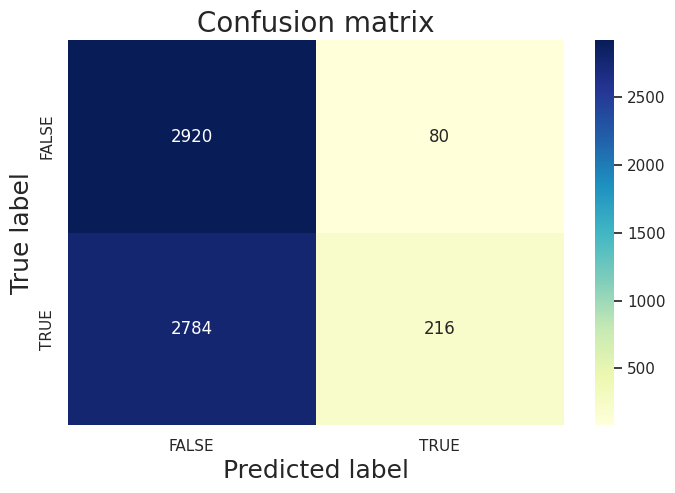

In [27]:
#create CF 
data = {'Actual': act,'Predicted' : pred,}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act, pred)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

In [28]:
tn, fp, fn, tp = confusion_matrix(act, pred).ravel()
print("True Negative (TN):", tn)
print("False Positive (FP):", fp)
print("False Negative (FN):", fn)
print("True Positive: (TP)", tp)

True Negative (TN): 2920
False Positive (FP): 80
False Negative (FN): 2784
True Positive: (TP) 216
